In [26]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import codecs
import pandas as pd
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud

## 读取数据

In [27]:
f = open('E:/Data_sets/text_ana/society_news.csv','r',encoding='utf-8')
df = pd.read_csv(f)
df.head(10)

,Unnamed: 0,content
0,0,以中和桥路为轴的红花片区，曾被冠以“南京主城最大城中村”之名，于去年启动征收。昨天，扬子...
1,1,", 越早签约补偿越多，补偿明细上墙公示"
2,2,提到拆迁，往往有“先搬吃亏，越拖补偿越多”的说法，但在红花片区的征收就行不通了。
3,3,在征收指挥部，动迁组长邢佳告诉记者，红花片区土地分为国有、集体两种，每种都设有两个计奖期...
4,4,“补偿多少钱，不再是以往面对面谈出来的，而是把住户各项条件摆出来套入一个‘政策公式’，合...
5,5,", 有人拿建筑许可证“加面积”，行不通"
6,6,今年69岁的陈爱英曾住在中和桥路188号，已经在这里住了近半个世纪。她是整个片区中第二户...
7,7,没有搬迁的居民情况是什么样的呢？傍晚时，记者跟随征收人员，来到一户尚未签约的居民家中。居...
8,8,“对于他要求的价格，我们也很无奈，因为现在补偿标准都是透明公开、按照政策办理，以前那种‘...
9,9,",个别渎职行为已进入司法程序"


In [28]:
df.content.values[:1]

array(['\u3000\u3000以中和桥路为轴的红花片区，曾被冠以“南京主城最大城中村”之名，于去年启动征收。昨天，扬子晚报记者探访现场看到，整个片区征收已经接近尾声，脏乱差的状况也将永远定格在2016。据悉，这是南京首次在城乡接合部地区实行“阳光征收”模式，补偿协议签订的过程与明细全部公开，将以往“先搬吃亏”的怪象彻底杜绝。'],
      dtype=object)

## 分词

In [29]:
df = df.dropna() #去空列
content = df.content.values.tolist()
content[:4]

['\u3000\u3000以中和桥路为轴的红花片区，曾被冠以“南京主城最大城中村”之名，于去年启动征收。昨天，扬子晚报记者探访现场看到，整个片区征收已经接近尾声，脏乱差的状况也将永远定格在2016。据悉，这是南京首次在城乡接合部地区实行“阳光征收”模式，补偿协议签订的过程与明细全部公开，将以往“先搬吃亏”的怪象彻底杜绝。',
 '\u3000,\u3000越早签约补偿越多，补偿明细上墙公示',
 '\u3000\u3000提到拆迁，往往有“先搬吃亏，越拖补偿越多”的说法，但在红花片区的征收就行不通了。',
 '\u3000\u3000在征收指挥部，动迁组长邢佳告诉记者，红花片区土地分为国有、集体两种，每种都设有两个计奖期。 “在房屋产权面积评估价的基础上，对于国有土地，2016年11月19日也就是国有的第一个计奖期开始前，住户可额外得到6万元奖励，12月20日第二个计奖期开始前4万元奖励，2017年1月3日晚12点计奖期结束，之后签约的就没有奖励了；对于集体土地，两档奖励分别是追加房屋产权面积评估价的30%、20%，12月14日集体的第二个计奖期已经结束，目前只能按照国有的政策实施征收。”也就是说，越早签约补偿越多。']

In [30]:
df = df.dropna() #去空列
content = df.content.values.tolist()
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n': #非空，不是换行符
                segment.append(seg)
    except:
        print(line)
        continue

## 去停用词

In [32]:
words_df = pd.DataFrame({'segment':segment})
stopswords = pd.read_csv('E:/Data_sets/text_ana/stopwords.txt',index_col=False,quoting=3,sep="\t",encoding='utf-8')
#stopswords.head()

words_df = words_df[~words_df.segment.isin(stopswords)] #不在停用词

## 统计词频

In [38]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'计数':np.size})# 分组，聚合
words_stat = words_stat.reset_index().sort_values(by=['计数'],ascending=False)
words_stat.head(10)

,segment,计数
207582,记者,41180
100481,工作,24413
219546,进行,23296
196367,自己,22885
18338,一个,21849
154912,没有,21357
229881,问题,17335
66756,发现,16809
27599,中国,16121
36848,他们,16045


## 词云

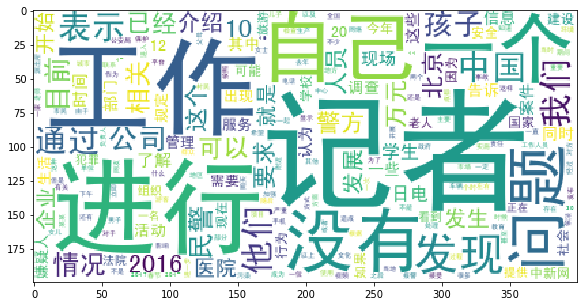

In [40]:
wordcloud = WordCloud(font_path=r'E:\Data_sets\text_ana\simhei.ttf', #字体
                      background_color='white',#背景色
                      max_font_size=100)  #最大字体字号

word_frequence = {x[0]:x[1] for x in words_stat.head(500).values} #x[0]:x[1]  关键词：词频
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

## 自定义背景图

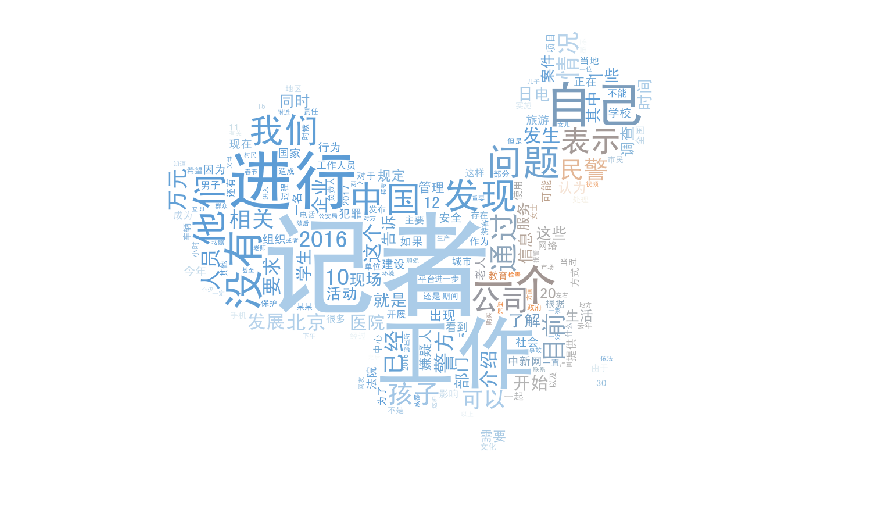

In [43]:
from scipy.misc import imread # 读取图片
matplotlib.rcParams['figure.figsize'] = (15.0, 20.0) # 设定可视化图的大小
from wordcloud import WordCloud,ImageColorGenerator # ImageColorGenerator 颜色生成器
bimg = imread(r'E:\Data_sets\text_ana\China_2.jpg')  # 读取模板图
wordcloud = WordCloud(background_color='white',  # 背景色是白色
                      mask = bimg,
                      font_path=r'E:\Data_sets\text_ana\simhei.ttf',
                      max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(500).values}
wordcloud = wordcloud.fit_words(word_frequence)
bimgColors = ImageColorGenerator(bimg)
plt.axis('off')
plt.imshow(wordcloud.recolor(color_func=bimgColors))